### **GMM（Gaussian Mixture Model）とEMアルゴリズム**

#### **GMMの概要**
ガウス混合モデル（GMM）は、データが複数の正規分布の混合で構成されていると仮定して、各データポイントがどの分布に属するかを推定する手法です。このモデルはクラスタリング問題を扱う際に非常に有効で、ラベルが与えられていないデータをもとに分布を推定します。

#### **最大尤度法を用いた正規分布のフィッティング**
最大尤度法（MLE）は、観測されたデータから確率分布のパラメータ（平均と分散）を推定する方法です。与えられたデータセットの平均と分散を求めることで、最も可能性の高い分布を推定します。

$$
\hat{\mu} = \frac{1}{m} \sum_{i=1}^{m} x(i) \tag{1}
$$

$$
\hat{\sigma}^2 = \frac{1}{m} \sum_{i=1}^{m} (x(i) - \mu)^2 \tag{2}
$$

#### **GMMの問題と解決方法**
GMMでは、ラベルのないデータに対して複数の正規分布を推定します。しかし、ラベルがないため、分布を推定するにはラベルが必要で、ラベルを取得するためには分布が必要という問題に直面します。この問題は、ランダムに分布を仮定し、繰り返し推定していくことで解決します。

1. **初期化**: 各データポイントに対するラベルをランダムに割り当てるか、初期の分布をランダムに設定します。
2. **ラベル付け**: 現在の分布に基づいて、各データポイントがどの分布に属するかの確率を計算し、ラベルを更新します。
3. **分布の更新**: 更新されたラベルに基づいて、新しい平均と分散を計算し、分布を更新します。
4. **収束まで繰り返す**: 分布とラベルが収束するまでこのプロセスを繰り返します。

#### **EMアルゴリズム（Expectation-Maximization）**
EMアルゴリズムは、GMMの基盤となるアルゴリズムで、「期待ステップ（E-step）」と「最大化ステップ（M-step）」の2つのステップで構成されます。

- **E-step**: 各データポイントのラベルを仮定し、それに基づいて各分布の尤度（確率）を計算します。
- **M-step**: E-stepで得られたラベルをもとに、各分布のパラメータ（平均、分散など）を再推定します。






### **GMMアルゴリズムと最大尤度法(MLE)の理解**

このセクションでは、GMM（ガウス混合モデル）アルゴリズムを全体的に説明するというよりも、MLE（最大尤度法）を用いてGMMの大まかな枠組みを理解することを目指しています。この説明は、GMMの基本的な概念を理解する手助けをするものであり、EM（期待値最大化）アルゴリズムの理解を助けることを主な目的としています。

### **GMMを通じた確率分布推定の概要**

以下の図2のように、縦の線上に10個のデータが与えられていると仮定します。各データにはラベルが付与されており、円の中の色が異なることで異なるラベルを意味しています。




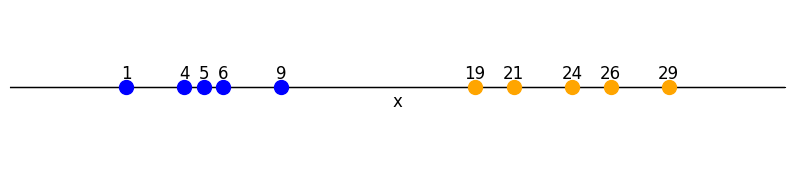

In [ ]:
import matplotlib.pyplot as plt

# データの設定
x_values = [1, 4, 5, 6, 9, 19, 21, 24, 26, 29]
blue_points = [1, 4, 5, 6, 9]   # 青い点の位置
orange_points = [19, 21, 24, 26, 29]  # オレンジの点の位置

# プロットの設定
plt.figure(figsize=(10, 2))

# 青い点のプロット
plt.scatter(blue_points, [0] * len(blue_points), color='blue', s=100, zorder=5, label='Group 1')

# オレンジの点のプロット
plt.scatter(orange_points, [0] * len(orange_points), color='orange', s=100, zorder=5, label='Group 2')

# 点の座標ラベル
for x in x_values:
    plt.text(x, 0.05, str(x), fontsize=12, ha='center')

# 軸の設定
plt.axhline(0, color='black', linewidth=1)
plt.xlim(-5, 35)
plt.ylim(-0.5, 0.5)
plt.xticks([])
plt.yticks([])
plt.xlabel('x', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_position(('data', 0))

# グリッド非表示
plt.grid(False)

plt.show()


図2: ラベルが付与されたDensity Estimation問題

このデータセットに対して確率分布を推定できるでしょうか？確率分布を推定するには様々な方法がありますが、パラメトリックな方法で確率分布を推定する場合、まず分布の形を仮定し、それに合ったパラメータを推定する必要があります。

### **最大尤度法(MLE)を用いたパラメータ推定**

最大尤度法(MLE)は、与えられたデータに基づいて分布のパラメータを推定する非常に有用な方法です。以下の図3は、図2のデータに対して正規分布を仮定し、パラメータを推定した結果を示しています。各ラベルに対応するデータの平均値と標準偏差を計算し、確率分布を推定します。




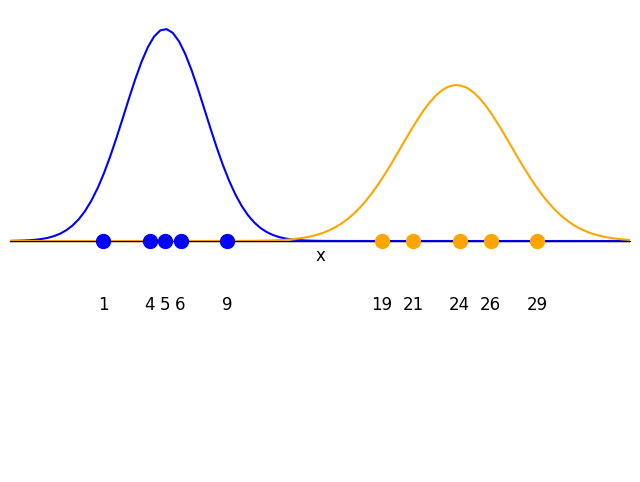

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# データの設定
x_values = [1, 4, 5, 6, 9, 19, 21, 24, 26, 29]
blue_points = [1, 4, 5, 6, 9]   # 青い点の位置
orange_points = [19, 21, 24, 26, 29]  # オレンジの点の位置

# プロットの設定
plt.figure(figsize=(8, 6))

# 青い点のプロット (y=0 に変更)
plt.scatter(blue_points, [0] * len(blue_points), color='blue', s=100, zorder=5, label='Group 1')

# オレンジの点のプロット (y=0 に変更)
plt.scatter(orange_points, [0] * len(orange_points), color='orange', s=100, zorder=5, label='Group 2')

# 点の座標ラベル
for x in x_values:
    plt.text(x, -0.15, str(x), fontsize=12, ha='center')

# 軸の設定
plt.axhline(0, color='black', linewidth=1)
plt.xlim(-5, 35)
plt.ylim(-0.5, 0.5)
plt.xticks([])
plt.yticks([])
plt.xlabel('x', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_position(('data', 0))

# グリッド非表示
plt.grid(False)

# 正規分布の曲線

# 平均と標準偏差を計算
blue_mean = np.mean(blue_points)
blue_std = np.std(blue_points)
orange_mean = np.mean(orange_points)
orange_std = np.std(orange_points)

# x軸の範囲を設定
x = np.linspace(-5, 35, 100)

# 正規分布の確率密度関数を計算
blue_pdf = norm.pdf(x, blue_mean, blue_std) * 3
orange_pdf = norm.pdf(x, orange_mean, orange_std) * 3

# 正規分布の曲線をプロット
plt.plot(x, blue_pdf, color='blue')
plt.plot(x, orange_pdf, color='orange')

plt.show()

図3: ラベルが付与されたデータを正規分布と仮定してパラメータを推定した結果

しかし、ラベルが与えられなかったらどうでしょうか。

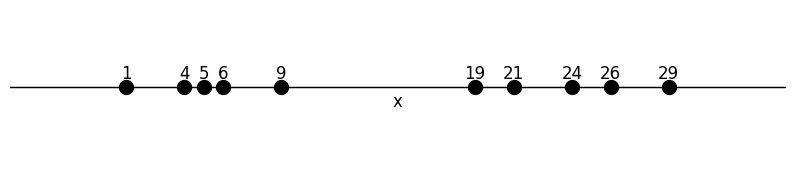

In [ ]:
import matplotlib.pyplot as plt

# データの設定
x_values = [1, 4, 5, 6, 9, 19, 21, 24, 26, 29]
blue_points = [1, 4, 5, 6, 9]   # 青い点の位置
orange_points = [19, 21, 24, 26, 29]  # オレンジの点の位置

# プロットの設定
plt.figure(figsize=(10, 2))

# 青い点のプロット
plt.scatter(blue_points, [0] * len(blue_points), color='black', s=100, zorder=5, label='Group 1')

# オレンジの点のプロット
plt.scatter(orange_points, [0] * len(orange_points), color='black', s=100, zorder=5, label='Group 2')

# 点の座標ラベル
for x in x_values:
    plt.text(x, 0.05, str(x), fontsize=12, ha='center')

# 軸の設定
plt.axhline(0, color='black', linewidth=1)
plt.xlim(-5, 35)
plt.ylim(-0.5, 0.5)
plt.xticks([])
plt.yticks([])
plt.xlabel('x', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_position(('data', 0))

# グリッド非表示
plt.grid(False)

plt.show()

上の図はラベルなしの場合を表します。ラベルを与えるためには確率分布が必要であり、確率分布を得るためには、パラメータを知る必要があります。また、パラメータを知るためには、各データにラベルが付与されていなければなりません。

これは鶏と卵の問題と同じで、ラベル得るためには分布が必要で、分布を得るためにはラベルが必要です。



このデータセットに対して確率分布を推定できるでしょうか？確率分布を推定するには様々な方法がありますが、パラメトリックな方法で確率分布を推定する場合、まず分布の形を仮定し、それに合ったパラメータを推定する必要があります。

したがって、私たちができることは、ランダムにラベルを付けて始めるか、ランダムに分布を設定して始めるかのいずれかです。

ここでは、各ラベルに対応する分布をランダムに設定して始めてみましょう。

この際、分布は各ラベルごとにパラメータ（$\mu$, $\sigma$）を選定し、それに基づいて各ラベルに対応する分布を与えます。

2つの分布が与えられたとすると、各データに対して分布の高さ（すなわち、尤度）を比較し、ラベリングを行うことができます。

オレンジ色と青色をそれぞれグループ1、グループ2とした場合、各グループの平均と標準偏差は次のようであったとしましょう。

$$
\mu_1 = 3, \sigma_1 = 2.9155
$$

$$
\mu_2 = 10, \sigma_2 = 3.9623
$$

この場合、各ラベルに対して図5のような分布を確認することができます。

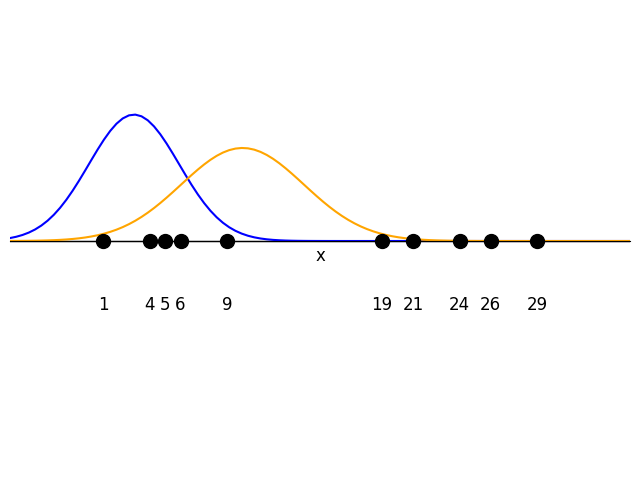

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# データの設定
x_values = [1, 4, 5, 6, 9, 19, 21, 24, 26, 29]
blue_points = [1, 4, 5, 6]   # 青い点の位置
orange_points = [9, 19, 21, 24, 26, 29]  # オレンジの点の位置

# プロットの設定
plt.figure(figsize=(8, 6))

# 青い点のプロット (y=0 に変更)
plt.scatter(blue_points, [0] * len(blue_points), color='black', s=100, zorder=5, label='Group 1')

# オレンジの点のプロット (y=0 に変更)
plt.scatter(orange_points, [0] * len(orange_points), color='black', s=100, zorder=5, label='Group 2')

# 点の座標ラベル
for x in x_values:
    plt.text(x, -0.15, str(x), fontsize=12, ha='center')

# 軸の設定
plt.axhline(0, color='black', linewidth=1)
plt.xlim(-5, 35)
plt.ylim(-0.5, 0.5)
plt.xticks([])
plt.yticks([])
plt.xlabel('x', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_position(('data', 0))

# グリッド非表示
plt.grid(False)

# 正規分布の曲線

# 平均と標準偏差を計算
blue_mean = 3
blue_std = 2.9155
orange_mean = 10
orange_std = 3.9623

# x軸の範囲を設定
x = np.linspace(-5, 35, 100)

# 正規分布の確率密度関数を計算
blue_pdf = norm.pdf(x, blue_mean, blue_std) * 2
orange_pdf = norm.pdf(x, orange_mean, orange_std) * 2

# 正規分布の曲線をプロット
plt.plot(x, blue_pdf, color='blue')
plt.plot(x, orange_pdf, color='orange')



2つのグループののラベルをそれぞれ0と1で表し、図のような分布が与えられたとしましょう。

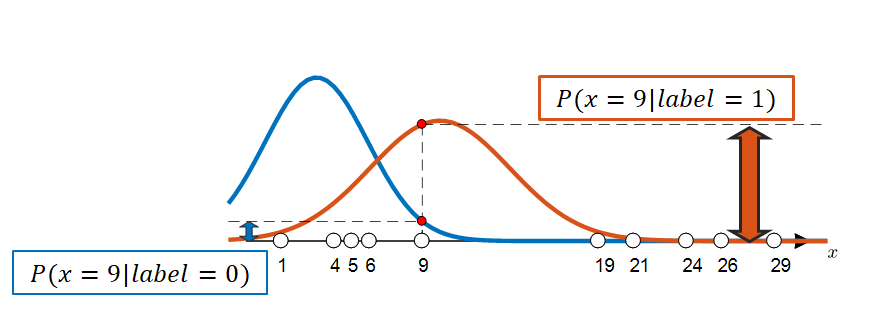

上図のように各データに対して各々のラベルになる確率を計算することができます。

上の方法でデータサンプルのラベルを確認すると以下のような推定結果が得られます。
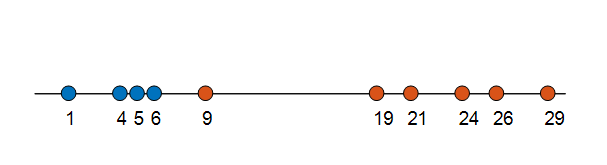

では、次は上の図で推定したラベルに従い、各グループの分布を予測してみましょう。

各グループの平均と標準偏差は次のようになっています。

$$
\mu_1 = 4, \sigma_1 = 2.1602
$$

$$
\mu_2 = 21.33, \sigma_2 = 7.0048
$$

これらの値を利用して各グループの分布を描くと、次のようになります。

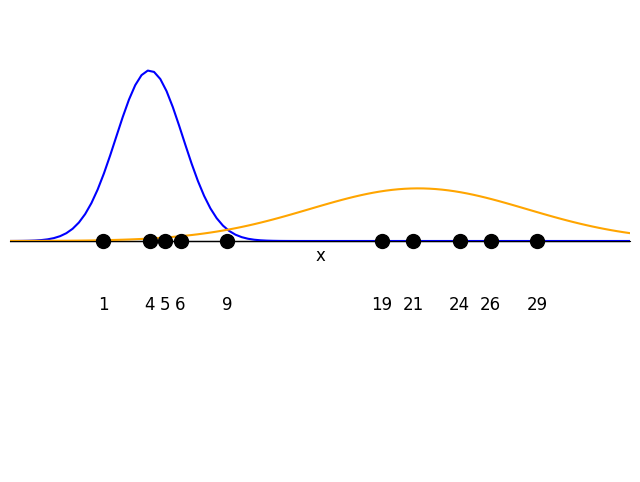

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# データの設定
x_values = [1, 4, 5, 6, 9, 19, 21, 24, 26, 29]
blue_points = [1, 4, 5, 6]   # 青い点の位置
orange_points = [9, 19, 21, 24, 26, 29]  # オレンジの点の位置

# プロットの設定
plt.figure(figsize=(8, 6))

# 青い点のプロット (y=0 に変更)
plt.scatter(blue_points, [0] * len(blue_points), color='black', s=100, zorder=5, label='Group 1')

# オレンジの点のプロット (y=0 に変更)
plt.scatter(orange_points, [0] * len(orange_points), color='black', s=100, zorder=5, label='Group 2')

# 点の座標ラベル
for x in x_values:
    plt.text(x, -0.15, str(x), fontsize=12, ha='center')

# 軸の設定
plt.axhline(0, color='black', linewidth=1)
plt.xlim(-5, 35)
plt.ylim(-0.5, 0.5)
plt.xticks([])
plt.yticks([])
plt.xlabel('x', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_position(('data', 0))

# グリッド非表示
plt.grid(False)

# 正規分布の曲線

# 平均と標準偏差を計算
blue_mean = 4
blue_std = 2.1602
orange_mean = 21.33
orange_std = 7.0048

# x軸の範囲を設定
x = np.linspace(-5, 35, 100)

# 正規分布の確率密度関数を計算
blue_pdf = norm.pdf(x, blue_mean, blue_std) * 2
orange_pdf = norm.pdf(x, orange_mean, orange_std) * 2

# 正規分布の曲線をプロット
plt.plot(x, blue_pdf, color='blue')
plt.plot(x, orange_pdf, color='orange')



結果図のように、分布が変化していることを確認できます。これを繰り返しながら、ラベリングをし直し、また、ラベリングの結果から新たらしくなった分布を利用してラベリングし直します。これを繰り返していくといつかは収束するであろうと予測することができます。

すなわち、「ランダムに分布を決定⇒尤度を比較しながらラベリングを行う⇒各グループごとにパラメータを推定する⇒推定されたパラメータを用いて描くグループ別の分布を図示⇒尤度を比較しながらラベリングを行う⇒…」を繰り返せば、いつかは最適解に収束します。


### **GMMの基本アイデア**

GMMは複数の正規分布を用いてデータの分布をモデル化します。これは、データを生成する潜在的なクラスターが複数の正規分布に従う可能性があるという仮定に基づいています。GMMは、それぞれのクラスターが一つの正規分布で表現できると仮定し、全体のデータをこれらの複数の正規分布の混合としてモデル化します。

### **GMMの適用とEMアルゴリズム**

EMアルゴリズムは、GMMのパラメータを推定する際に重要な役割を果たします。EMアルゴリズムは、データの潜在的なラベルを反復的に更新し、各クラスターの平均、分散、そしてクラスターに属する確率（事前確率）を推定します。

このアルゴリズムは以下の2つのステップに分けられます：

1. **Eステップ（Expectationステップ）**: 現在推定されているパラメータを使用して、各データが各クラスターに属する確率を計算します。
2. **Mステップ（Maximizationステップ）**: Eステップで計算された確率を基にパラメータを更新します。

このプロセスは収束するまで繰り返され、結果としてデータの分布をよく説明するパラメータが推定されます。

### **まとめ**

GMMアルゴリズムは、MLEとEMアルゴリズムの組み合わせによって、データの複雑な分布をモデル化する強力なツールです。この説明はGMMの全体的な構造とMLEの活用を理解することに焦点を当てており、EMアルゴリズムを深く理解するためにも役立ちます。

もしGMMアルゴリズムの具体的な作動方式に関するより深い理解が必要でない場合は、この説明だけでも十分にGMMの基本的なアイデアを理解できるでしょう。

#### **GMMの問題と解決方法**
GMMでは、ラベルのないデータに対して複数の正規分布を推定します。しかし、ラベルがないため、分布を推定するにはラベルが必要で、ラベルを取得するためには分布が必要という問題に直面します。この問題は、ランダムに分布を仮定し、繰り返し推定していくことで解決します。

1. **初期化**: 各データポイントに対するラベルをランダムに割り当てるか、初期の分布をランダムに設定します。
2. **ラベル付け**: 現在の分布に基づいて、各データポイントがどの分布に属するかの確率を計算し、ラベルを更新します。
3. **分布の更新**: 更新されたラベルに基づいて、新しい平均と分散を計算し、分布を更新します。
4. **収束まで繰り返す**: 分布とラベルが収束するまでこのプロセスを繰り返します。

#### **EMアルゴリズム（Expectation-Maximization）**
EMアルゴリズムは、GMMの基盤となるアルゴリズムで、「期待ステップ（E-step）」と「最大化ステップ（M-step）」の2つのステップで構成されます。

- **E-step**: 各データポイントのラベルを仮定し、それに基づいて各分布の尤度（確率）を計算します。
- **M-step**: E-stepで得られたラベルをもとに、各分布のパラメータ（平均、分散など）を再推定します。

以下のステップを繰り返すことで、最終的に分布とラベルが収束することを目指します。

#### **EMアルゴリズムの詳細**
1. **E-step**: 各データポイント $ i $ がクラスタ $ j $ に属する確率を計算します。

$$
w(i)_j := p(z(i) = j | x(i); \phi, \mu, \Sigma)
$$

2. **M-step**: それぞれのクラスタのパラメータを更新します。

$$
\phi_j := \frac{1}{m} \sum_{i=1}^{m} w(i)_j
$$

$$
\mu_j := \frac{\sum_{i=1}^{m} w(i)_j x(i)}{\sum_{i=1}^{m} w(i)_j}
$$

$$
\Sigma_j := \frac{\sum_{i=1}^{m} w(i)_j (x(i) - \mu_j)(x(i) - \mu_j)^T}{\sum_{i=1}^{m} w(i)_j}
$$

#### **Pythonによる実装例**
以下に、PythonによるGMMアルゴリズムの実装例を示します。仮想データを用いて、データの割合を7:3、平均を0と15に設定してGMMを適用します。

実行コードとその結果のビジュアルについては、Google Colaboratory環境で確認することができます。

このように、EMアルゴリズムとGMMを組み合わせることで、ラベルのないデータから複数の分布を推定し、クラスタリングを行うことが可能になります。

Mounted at /content/drive


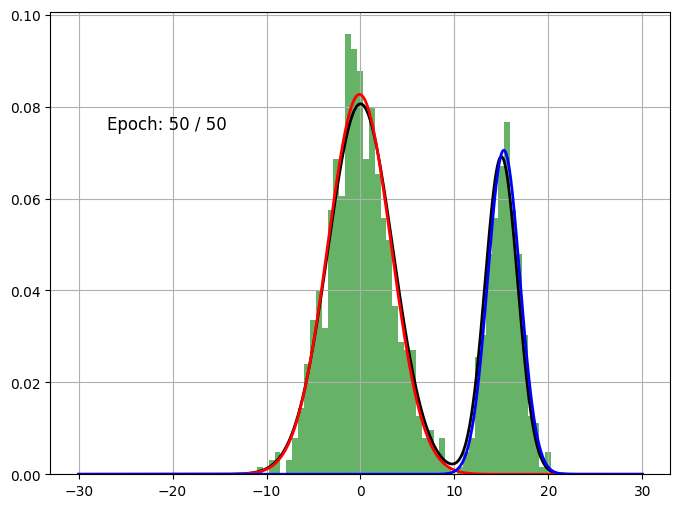

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.animation as animation

from google.colab import drive
drive.mount('/content/drive')


# GMMアルゴリズムの手動実装

# 仮想データの生成
# データは2つのグループに分かれ、平均は0と15で設定
# 各グループの比率は7:3で、phi = [0.7, 0.3]とする

np.random.seed(1)
mu = [0, 15]  # 平均値
vars = [12, 3]  # 分散
n_data = 1000  # データ数
phi = [0.7, 0.3]  # 各グループの比率
X = []

# データ生成
for _ in range(n_data):
    if np.random.rand() < 0.7:
        X.append(np.random.randn() * np.sqrt(vars[0]) + mu[0])
    else:
        X.append(np.random.randn() * np.sqrt(vars[1]) + mu[1])
X = np.array(X)

# データ分布の確認
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(X, bins=50, density=True, alpha=0.6, color='g')

xx = np.linspace(-30, 30, 1000)
yy1 = norm.pdf(xx, mu[0], np.sqrt(vars[0]))
yy2 = norm.pdf(xx, mu[1], np.sqrt(vars[1]))
ax.plot(xx, yy1 * phi[0] + yy2 * phi[1], 'k', linewidth=2)

ax.set_xlabel('x')
ax.set_ylabel('pdf')

# GMMアルゴリズムの実装

# 初期化
est_mu = [-25, 20]
est_vars = [7, 9.5]
est_phi = [0.5, 0.5]
n_iter = 50
est_w = np.zeros((n_data, 2))

# GIFアニメーションの作成
ims = []

def update_plot(i_iter):
    global est_mu, est_vars, est_phi, est_w

    # E-step
    for i in range(n_data):
        l1 = norm.pdf(X[i], est_mu[0], np.sqrt(est_vars[0]))
        l2 = norm.pdf(X[i], est_mu[1], np.sqrt(est_vars[1]))
        est_w[i, 0] = (l1 * est_phi[0]) / (l1 * est_phi[0] + l2 * est_phi[1])
        est_w[i, 1] = (l2 * est_phi[1]) / (l1 * est_phi[0] + l2 * est_phi[1])

    # M-step
    est_phi = np.sum(est_w, axis=0) / n_data
    est_mu[0] = np.sum(X * est_w[:, 0]) / np.sum(est_w[:, 0])
    est_mu[1] = np.sum(X * est_w[:, 1]) / np.sum(est_w[:, 1])
    est_vars[0] = np.sum(est_w[:, 0] * (X - est_mu[0])**2) / np.sum(est_w[:, 0])
    est_vars[1] = np.sum(est_w[:, 1] * (X - est_mu[1])**2) / np.sum(est_w[:, 1])

    # 描画用の更新
    est_yy1 = norm.pdf(xx, est_mu[0], np.sqrt(est_vars[0]))
    est_yy2 = norm.pdf(xx, est_mu[1], np.sqrt(est_vars[1]))

    ax.clear()
    ax.hist(X, bins=50, density=True, alpha=0.6, color='g')
    ax.plot(xx, yy1 * phi[0] + yy2 * phi[1], 'k', linewidth=2)
    ax.plot(xx, est_yy1 * est_phi[0], 'r', linewidth=2)
    ax.plot(xx, est_yy2 * est_phi[1], 'b', linewidth=2)
    ax.text(-27, 0.075, f'Epoch: {i_iter + 1} / {n_iter}', fontsize=12)
    ax.grid(True)

# アニメーション作成
ani = animation.FuncAnimation(fig, update_plot, frames=n_iter, repeat=False)

# GIFとして保存
ani.save('/content/drive/MyDrive/Colab Notebooks/Statistics/gmm_animation.gif', writer='imagemagick', fps=5)

plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


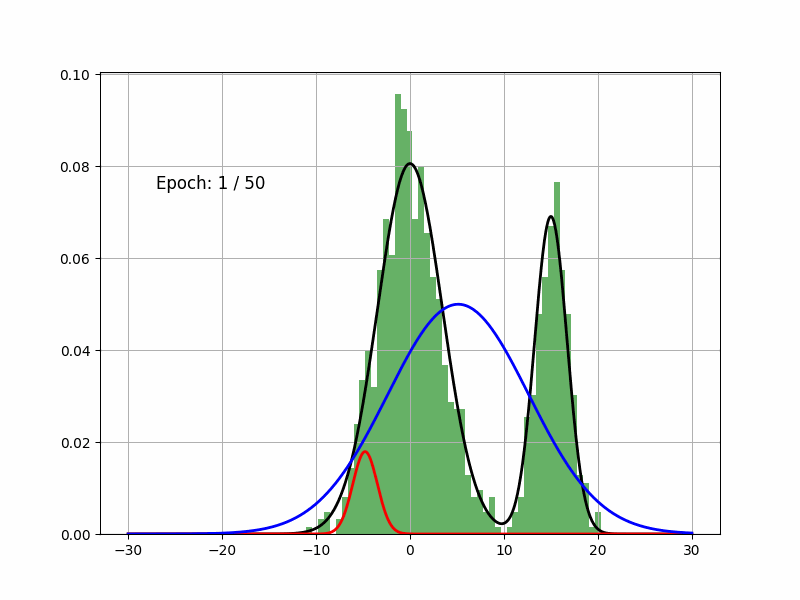

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/Statistics/gmm_animation.gif')